###  선형회귀 이해하기
- 성적 데이터를 기반으로 선형회귀를 이해해보자

- 선형모델 
    : 입력 데이터를 설명할 수있는 선형 함수를 구하는 것
    : 선형함수 기본식
    : 문제가 1개 ==> y = wx + b
    : 문제가 p개 ==> y = w1x1 + w2x2 + ... + wpxp + b
    : 입력 데이터를 완벽하게 설명하는 선형함수를 찾는 것은 불가능 
          ==> 오차가 가장 작은 선형함수 찾자 : MSE가 가장 작은 선형함수가 최선의 선형함수
          그릴 수 있는 선형함수의 수가 무한대이기 때문에 모든 선형함수의 오차를 계산할 수 없음.

In [1]:
# 성적데이터 생서을 위한 라이브러리 꺼내오기
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# 성적데이터 생성
data = pd.DataFrame([[2, 20],[4,40],[8,80],[9,90]],
            index = ['명인','한수','보원','한솔'],
            columns=['시간','성적'])

In [3]:
data

,시간,성적
명인,2,20
한수,4,40
보원,8,80
한솔,9,90


### MSE가 최소가 되는 최적의 w,b를 찾는 방법
- MSE : 평균제곱오차(mean squeared error) --> 비용함수(cost)
- 1. 수학 공식을 이용한 해석적 모델 : LinearRegression
- 2. 경사하강법 : SGDRegressor --> XGBoost에서 오차를 계산하는 방법

### 수학 공식을 이용한 해석적 모델
- LinearREgression
- 공식을 이용해서 적은 계싼으로 한번에 최적의 선형함수를 찾는 방법 ==> 장점
- 공식이 완벽하지 않을 경우 최적의 선형함수를 잘 못 찾을 수도 있고, => 단점
- 공식이 잘못되었을 때 고칠 수 없다는 문제가 있음. -> 나중에 규제를 걸 예정


In [4]:
from sklearn.linear_model import LinearRegression

# 모델 생성
lm = LinearRegression()

# 학습
lm.fit(data[['시간']], data['성적']) # 문제는 2차원, 정답은 1차원

LinearRegression()

In [22]:
 y = wx + b #(1개의 문제)

NameError: name 'x' is not defined

In [17]:
# 기울기, 가중치 출력
print('기울기, 가중치 :', lm.coef_)


# 절편, 편향 출력 
print('절편,편향 : ', lm.intercept_)

기울기, 가중치 : [10.]
절편,편향 :  7.105427357601002e-15


In [10]:
# 수환씨가 7시간 공부했을 때 몇 점? - 예측
lm.predict([[7]])

C:\Users\gjaischool\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([70.])

#### H(x)
- 가설함수

In [18]:
# 함수 정의
def h(w, x):
    return w*x + 0

#### 비용함수(Cost function)
- 비용함수

In [26]:
# 비용함수 정의
# data : 문제값
# target : 정답(실제값)
# weight : 가중치 

def cost(data, target, weight) :
    # 예측
    y_pre= h(weight, data)
    
    # 평균제곱오차 = (내가 예측한 예측값 - 실제값 ** 2).mean()
    error = ((y_pre - target) ** 2).mean() 
    return error

In [27]:
# 가중치에 따른 오차값 확인 
cost(data['시간'], data['성적'], 1)

3341.25

In [28]:
# 가중치 변화에 따른 비용 함수의 변화를 그래프로 확인하기 
cost_list = []

# -10 ~ 30 가중치 변화 
for w in range(-10,31):
   err = cost(data['시간'], data['성적'], w)
   cost_list.append(err)
cost_list    

[16500.0,
 14891.25,
 13365.0,
 11921.25,
 10560.0,
 9281.25,
 8085.0,
 6971.25,
 5940.0,
 4991.25,
 4125.0,
 3341.25,
 2640.0,
 2021.25,
 1485.0,
 1031.25,
 660.0,
 371.25,
 165.0,
 41.25,
 0.0,
 41.25,
 165.0,
 371.25,
 660.0,
 1031.25,
 1485.0,
 2021.25,
 2640.0,
 3341.25,
 4125.0,
 4991.25,
 5940.0,
 6971.25,
 8085.0,
 9281.25,
 10560.0,
 11921.25,
 13365.0,
 14891.25,
 16500.0]

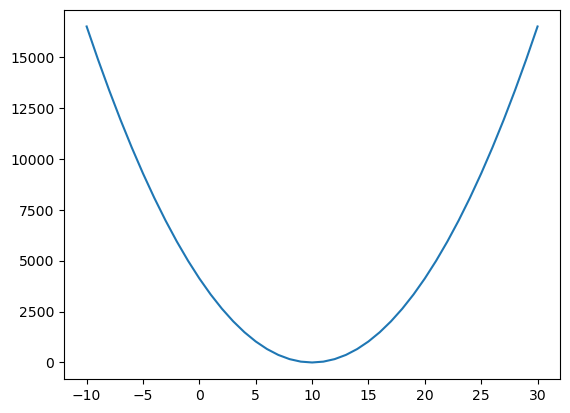

In [29]:
# 비용함수(MSE) 그래프 그리기
plt.plot(range(-10,31),cost_list)

In [39]:
# 분류 모델 : 정확도 - score
# 회귀 모델 : score (R2 스코어 - 유사도)

lm.score(data[['시간']],data['성적'])

1.0

#### 경사하강법 
- 깜깜한 산 정상에서 아래로 내려가는 방법을 찾는 바업
- SGDRegressor 
- 점진적으로 오차가 작은 선형함수를 찾아가는 방법 
- 오차를 수정하는 방향으로 그래프를 다시 그려줌.
- 선형함수를 잘못 찾았을 경우 수정이 가능. ==> 장점
- 점진적으로 찾아가므로 계산량이 많아 시간이 오래 걸림 ==> 단점
- 학습율(learning rate)
    - 너무 크게 설정하면 : 오차가 커짐(발산)
    - 너무 작게 설정하면 : 국소지역점에 빠져서 최적의 해를 찾지 못함.

In [33]:
from sklearn.linear_model import SGDRegressor

# 모델 생성 
sgd_model = SGDRegressor(max_iter=5000,
                        eta0=0.001,
                        verbose=1)

# 학습
sgd_model.fit(data[['시간']], data['성적'])

-- Epoch 1
Norm: 1.31, NNZs: 1, Bias: 0.182514, T: 4, Avg. loss: 1873.894792
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.17, NNZs: 1, Bias: 0.303291, T: 8, Avg. loss: 1450.241528
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.85, NNZs: 1, Bias: 0.399331, T: 12, Avg. loss: 1183.061713
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 3.43, NNZs: 1, Bias: 0.480520, T: 16, Avg. loss: 984.706432
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 3.94, NNZs: 1, Bias: 0.550660, T: 20, Avg. loss: 829.475348
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 4.38, NNZs: 1, Bias: 0.612149, T: 24, Avg. loss: 705.971803
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 4.77, NNZs: 1, Bias: 0.666779, T: 28, Avg. loss: 605.207432
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 5.12, NNZs: 1, Bias: 0.715786, T: 32, Avg. loss: 521.650618
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 5.44, NNZs: 1, Bias: 0.759976, T: 36, Avg. loss: 452.063539
Total training time: 0.00 

SGDRegressor(eta0=0.001, max_iter=5000, verbose=1)

In [35]:
# 예측
sgd_model.predict([[7]])

C:\Users\gjaischool\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(


array([69.88279285])

In [40]:
# 가중치, 절편 확인하기
print('가중치 : ',sgd_model.coef_)
print('절편 : ',sgd_model.intercept_)

가중치 :  [9.79226332]
절편 :  [1.3369496]


In [41]:
sgd_model.score(data[['시간']], data['성적'])

# 회귀 score : 모델의 예측 성능 판단
# 1에 가까울수록 모델이 예측ㅎ나 성능이 높다고 판단

0.9995436658345412